<a href="https://colab.research.google.com/github/Jessy0786/Mujeres-Digitales-Jessy/blob/main/Taller_semana_7Jessy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jesyca Maria Patiño

## Introducción

**Contexto comercial.** Usted es un analista en una entidad bancaria, y se le proporciona un conjunto de datos de los clientes. Su jefe le pide que analice la información para determinar si existen similaridades entre grupos de clientes para lanzar una campaña de mercadeo.

**Problema comercial.** Su tarea es **crear un modelo de clusterización para determinar si existen grupos de clientes similares**.

**Contexto analítico.** Como científico de datos, se le pide realizar una clusterización de los clientes para identificar 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/Lending_club_cleaned_2.csv")

In [ ]:
df.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


## Ejercicio 1:

Realice una normalización de los datos numéricos es decir que los valores oscilen entre 0 y 1 en las columnas  annual_inc y loan_amnt.
Consejo: antes de realizar la normalización asegúrese de que el tipo de dichas columnas si sea numérico.

Datos normalizados : 
        loan_status  annual_inc  ...        term grade
0       Fully Paid    0.003336  ...   36 months     B
1      Charged Off    0.004336  ...   60 months     C
2       Fully Paid    0.001376  ...   36 months     C
3       Fully Paid    0.007538  ...   36 months     C
4       Fully Paid    0.012675  ...   60 months     B
...            ...         ...  ...         ...   ...
38700   Fully Paid    0.017678  ...   36 months     A
38701   Fully Paid    0.002335  ...   36 months     C
38702   Fully Paid    0.016011  ...   36 months     A
38703   Fully Paid    0.032688  ...   36 months     A
38704   Fully Paid    0.003002  ...   36 months     E

[38705 rows x 10 columns]


Text(0.5, 0, 'loan_amnt')

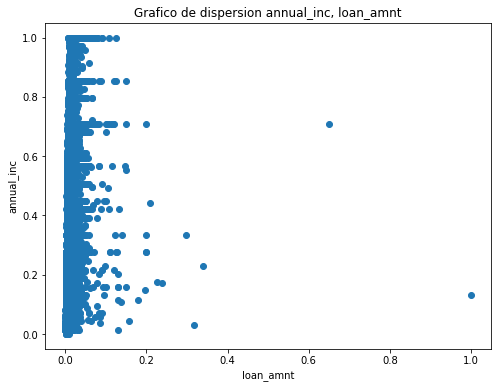

In [ ]:
# Forma 1 de normalizar los datos
#print("Datos originales : \n",df)
scaler = MinMaxScaler(feature_range=(0,1))
df_normalizado = df
df_normalizado[['loan_status','annual_inc','loan_amnt']] = df[['loan_status','annual_inc','loan_amnt']]
df_normalizado[['annual_inc','loan_amnt']] = scaler.fit_transform(df_normalizado[['annual_inc','loan_amnt']])
print("Datos normalizados : \n",df_normalizado)

#Grafica de dispersion con los datos normalizados
plt.figure(figsize=(8, 6))
plt.scatter(df_normalizado['annual_inc'],df_normalizado['loan_amnt'])
plt.title("Grafico de dispersion annual_inc, loan_amnt")
plt.ylabel('annual_inc')
plt.xlabel('loan_amnt')

       annual_inc  loan_amnt
0        0.003336   0.130435
1        0.004336   0.057971
2        0.001376   0.055072
3        0.007538   0.275362
4        0.012675   0.072464
...           ...        ...
38700    0.017678   0.057971
38701    0.002335   0.231884
38702    0.016011   0.130435
38703    0.032688   0.130435
38704    0.003002   0.202899

[38705 rows x 2 columns]


Text(0.5, 0, 'loan_amnt')

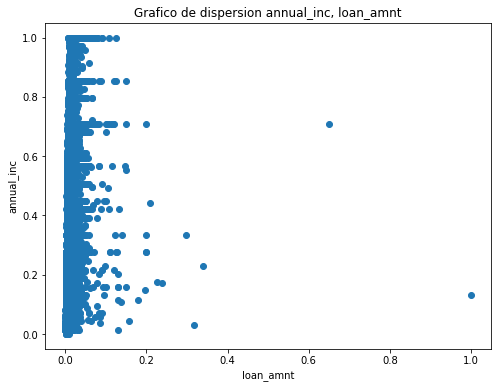

In [ ]:
# Otra forma de normalizar los datos
def normalize(df):
  result = df.copy()

  for feature_name in df.columns:
    max_val = df[feature_name].max()
    min_val = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_val) / ( max_val- min_val)
    return result
df_normalizado2 = normalize(df[['annual_inc','loan_amnt']])
print(df_normalizado2)

#Grafica de dispersion con los datos normalizados
plt.figure(figsize=(8, 6))
plt.scatter(df_normalizado2['annual_inc'],df_normalizado2['loan_amnt'])
plt.title("Grafico de dispersion annual_inc, loan_amnt")
plt.ylabel('annual_inc')
plt.xlabel('loan_amnt')

## Ejercicio 2:

Emplee el algoritmo de k-means para agrupar a los clientes usando un número de clusters de 4.

In [ ]:
# Escriba aquí su codigo
kmeans = KMeans(n_clusters=4).fit(df_normalizado[['annual_inc','loan_amnt']])
centroids = kmeans.cluster_centers_
print(centroids)                 

[[0.01788992 0.78197901]
 [0.0104421  0.27980335]
 [0.00849035 0.11657391]
 [0.01265608 0.48122444]]


## Ejercicio 3 (Opcional):

Realice un gráfico de dispersión (scatter) para vizualizar los cluster que descubrió en el punto anterior (ejercicio 2). Usando colores diferentes para identificar los 4 cluster.

Text(0.5, 0, 'loan_amnt')

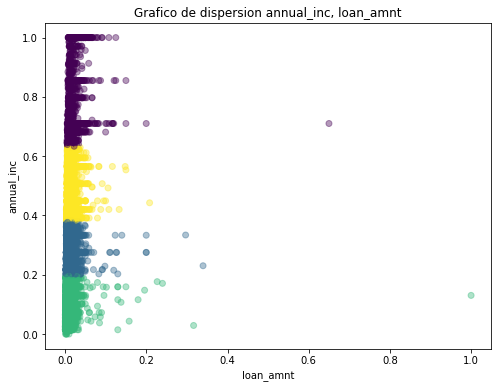

In [ ]:
# Escriba aquí su codigo
plt.figure(figsize=(8, 6))
plt.scatter(df_normalizado['annual_inc'],df_normalizado['loan_amnt'], c=kmeans.labels_.astype(float), alpha=0.4)
plt.title("Grafico de dispersion annual_inc, loan_amnt")
plt.ylabel('annual_inc')
plt.xlabel('loan_amnt')
#plt.scatter(df_normalizado['annual_inc'],df_normalizado['loan_amnt'], c=[matplotlib.cm.spectral(float(i) /10) for i in kmeans.labels_]); 

Text(0.5, 0, 'annual_inc')

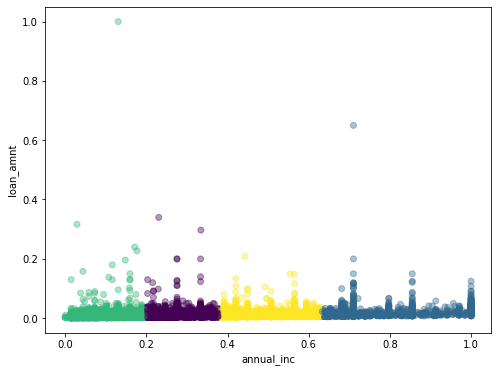

In [ ]:
#plt.figure(figsize=(50, 50))
#ax = sns.scatterplot(data=[df_normalizado['annual_inc'],df_normalizado['loan_amnt']])
plt.figure(figsize=(8, 6))
plt.scatter(df_normalizado['loan_amnt'],df_normalizado['annual_inc'], c=kmeans.labels_.astype(float), alpha=0.4)
plt.ylabel('loan_amnt')
plt.xlabel('annual_inc')

## Ejercicio 4 (Opcional):

Use el método del codo para verificar cual es el número de clusters óptimo. Revise desde 1 clúster hasta 11 para realizar esta validación.

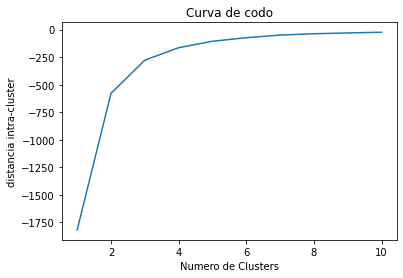

In [ ]:
# Escriba aquí su codigo
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_normalizado[['annual_inc','loan_amnt']]).score(df_normalizado[['annual_inc','loan_amnt']]) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('distancia intra-cluster')
plt.title('Curva de codo')
plt.show()

#k = 3 es una buena seleccion de numero de cluster ya que se donde se presenta un cambio brusco en la grafica formando el codo